# WHO Life Expectancy EDA

## Introduction
We have been tasked with providing an estimate prediction of life expectancies across countries on the globe. 

Data has been provided by the World Health Organisation (WHO). It contains records from 2000 to 2015 across 179 countries.

The predictive process involves various stages:
* Exploratory Data Analysis (EDA) 
    * Checks for data errors or inconsistencies
    * Explore trends and links between features in the dataset
* Feature Engineering
    * Remove features as necessary
    * Scale or normalize features
    * Identify potential *sensitive data* which may raise ethical concerns
* Modelling
    * Produce a robust best-performing linear regression model to predict life expectancy
    * Produce a robust minimalistic linear regression model to predict life expectancy
* Testing
    * Test both models against existing and unseen data to ensure robustness and accuracy
* Outcome Function
    * Prompts user inputs to take in relevant population statistics
    * Decides which model to use (best-performing or minimalistic) based on user input
    * Makes a prediction of average life expectancy

In [2]:
# Importing necessary packages
import pandas as pd # For general data use
import seaborn as sns # For data visualisation
import matplotlib.pyplot as plt # For data visualisation
import numpy as np # For mathematical operations

In [3]:
# Creating dataframe from CSV file
df = pd.read_csv('Life Expectancy Data.csv')

In [4]:
df.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.53   
1          97           0.09           25742           46.44   
2          64           0.13            1076         1183.21   
3          93           0.79            4146            0.75   
4          94           0.08           33995            7.91   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                       4.8        7.8   
1                          0.6                       0.5        9.7   
2                         27.1                      28.0        5.0   
3                          5.7                       5.5        7.9   
4                          1.2                       1.1       12.8   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             76.5  
1                         1                          0             82.8  
2                         0                          1             65.4  
3                         0                          1             67.0  
4                         1                          0             81.7  

[5 rows x 21 columns]

# Data Checks
Basic data checks give us an idea of the dataframe size, variation, data types, and any missing information.

In [5]:
# Checking dataframe length, columns, and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [6]:
# Summary statistics of numerical data
df.describe()

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.363792          42.938268       192.251775   
std       4.610577      27.538117          44.569974       114.910281   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2003.750000       8.100000           9.675000       106.910250   
50%    2007.500000      19.600000          23.100000       163.841500   
75%    2011.250000      47.350000          66.000000       246.791375   
max    2015.000000     138.100000         224.900000       719.360500   

       Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820882    84.292598    77.344972    25.032926   
std               3.981949    15.995511    18.659693     2.193905   
min               0.000000    12.000000    10.000000    19.800000   
25%               1.200000    78.000000    64.000000    23.200000   
50%               4.020000    89.000000    83.000000    25.500000   
75%               7.777500    96.000000    93.000000    26.400000   
max              17.870000    99.000000    99.000000    32.100000   

             Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  2864.000000  2864.000000    2864.000000     2864.000000   
mean     86.499651    86.271648       0.894288    11540.924930   
std      15.080365    15.534225       2.381389    16934.788931   
min       8.000000    16.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1415.750000   
50%      93.000000    93.000000       0.150000     4217.000000   
75%      97.000000    97.000000       0.460000    12557.000000   
max      99.000000    99.000000      21.680000   112418.000000   

       Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
count     2864.000000                  2864.000000               2864.000000   
mean        36.675915                     4.865852                  4.899825   
std        136.485867                     4.438234                  4.525217   
min          0.080000                     0.100000                  0.100000   
25%          2.097500                     1.600000                  1.600000   
50%          7.850000                     3.300000                  3.400000   
75%         23.687500                     7.200000                  7.300000   
max       1379.860000                    27.700000                 28.600000   

         Schooling  Economy_status_Developed  Economy_status_Developing  \
count  2864.000000               2864.000000                2864.000000   
mean      7.632123                  0.206704                   0.793296   
std       3.171556                  0.405012                   0.405012   
min       1.100000                  0.000000                   0.000000   
25%       5.100000                  0.000000                   1.000000   
50%       7.800000                  0.000000                   1.000000   
75%      10.300000                  0.000000                   1.000000   
max      14.100000                  1.000000                   1.000000   

       Life_expectancy  
count      2864.000000  
mean         68.856075  
std           9.405608  
min          39.400000  
25%          62.700000  
50%          71.400000  
75%          75.400000  
max          83.800000

In [7]:
# Checking number of null values
# No nulls
df.isnull().sum().sum()

0

In [8]:
# Checking for duplicates
# No duplicates
df.duplicated().sum()

0

## Notes
* There 2864 entries in the dataframe.
* All features except `Year` and `Country` have numerical data types. These two features are objects, and require One Hot Encoding before usage in a model.
* There are no null values and no duplicate entries.
* Features `Economy_status_Developed` and `Economy_status_Developing` are already One Hot Encoded.
* Various features - `Hepatitis_B`, `Polio`, `Diphtheria`, `Thinness_ten_nineteen_years`, `Thinness_five_nine_years`- are measured as percentage. As a result, these all range between 0 and 100.
* The features `Hepatitis_B`, `Polio`, and `Diphtheria` record percentage immunisation coverage among 1 year olds. A higher value is therefore more positive.
* The `Measles` feature records number of recorded cases per 1000 people. A higher value is therefore more negative.

# Correlations
A heatmap provides us with information about how features interact - whether any features tell us the same information, and whether any features may be key indicators in life expectancy prediction.

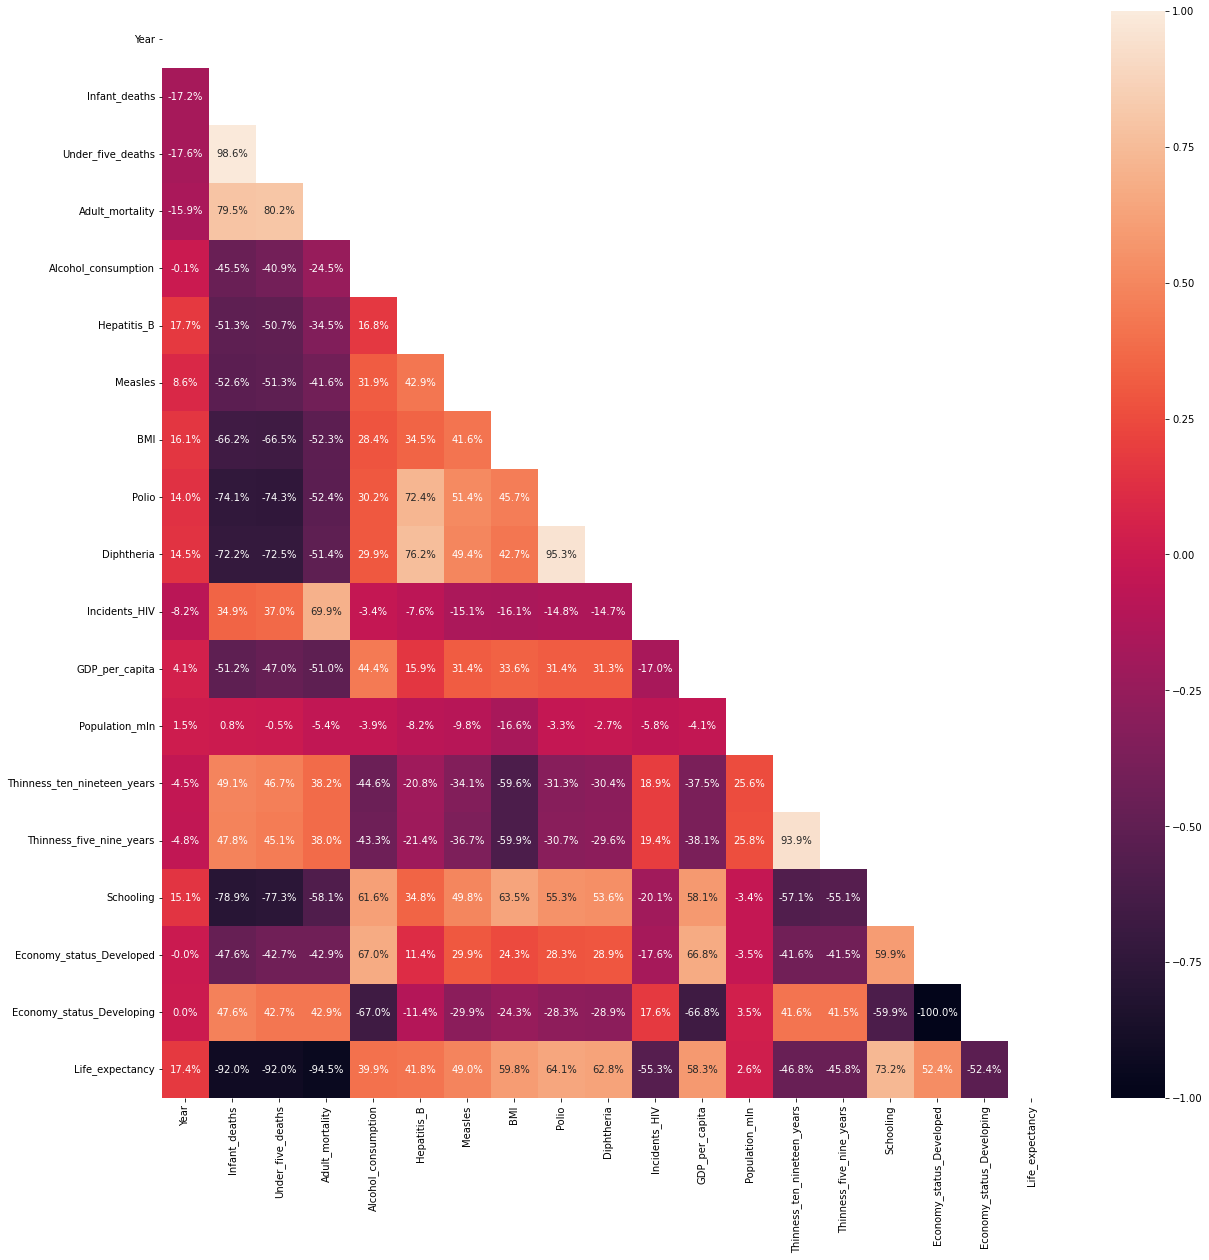

In [9]:
# Checking correlations between columns
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(),
            annot = True,
           vmin = -1,
           vmax = 1,
           fmt = '.1%',
           mask = np.triu(df.corr()))
plt.show()

In [10]:
# Checking for inconsistencies between developed and developing countries
# Perfect negative correlation between the two variables, both provide the same information
# Remove one column to avoid mulitcollinearity in modelling
df.loc[((df.Economy_status_Developed == 1) & (df.Economy_status_Developing == 1)) | ((df.Economy_status_Developed == 0) & (df.Economy_status_Developing == 0))][['Economy_status_Developed', 'Economy_status_Developing']].sum()

Economy_status_Developed     0.0
Economy_status_Developing    0.0
dtype: float64

## Notes
* We observe an extremely strong correlation between the following feature pairs:
    * `Life_expectancy` and `Infant_deaths`
    * `Life_expectancy` and `Under_five_deaths`
    * `Life_expectancy` and `Adult_mortality`
    * `Under_five_deaths` and `Infant_deaths`
    * `Economy_status_Developing` and `Economy_status_Developed`
    * `Thinness_five_nine_years` and `Thinness_ten_nineteen_years`
    * `Diphtheria` and `Polio`
* Features `Economy_status_Developed` and `Economy_status_Developing` have a perfect negative correlation, meaning they display the same information but in reverse. Therefore, we can remove one of these columns to reduce dataframe size.

# Data Exploration
Data exploration allows us to gain further insight into feature relationships and dsitribtuions. We use this exploration during the next stage, feature engineering, to know whether any features need removing or scaling.

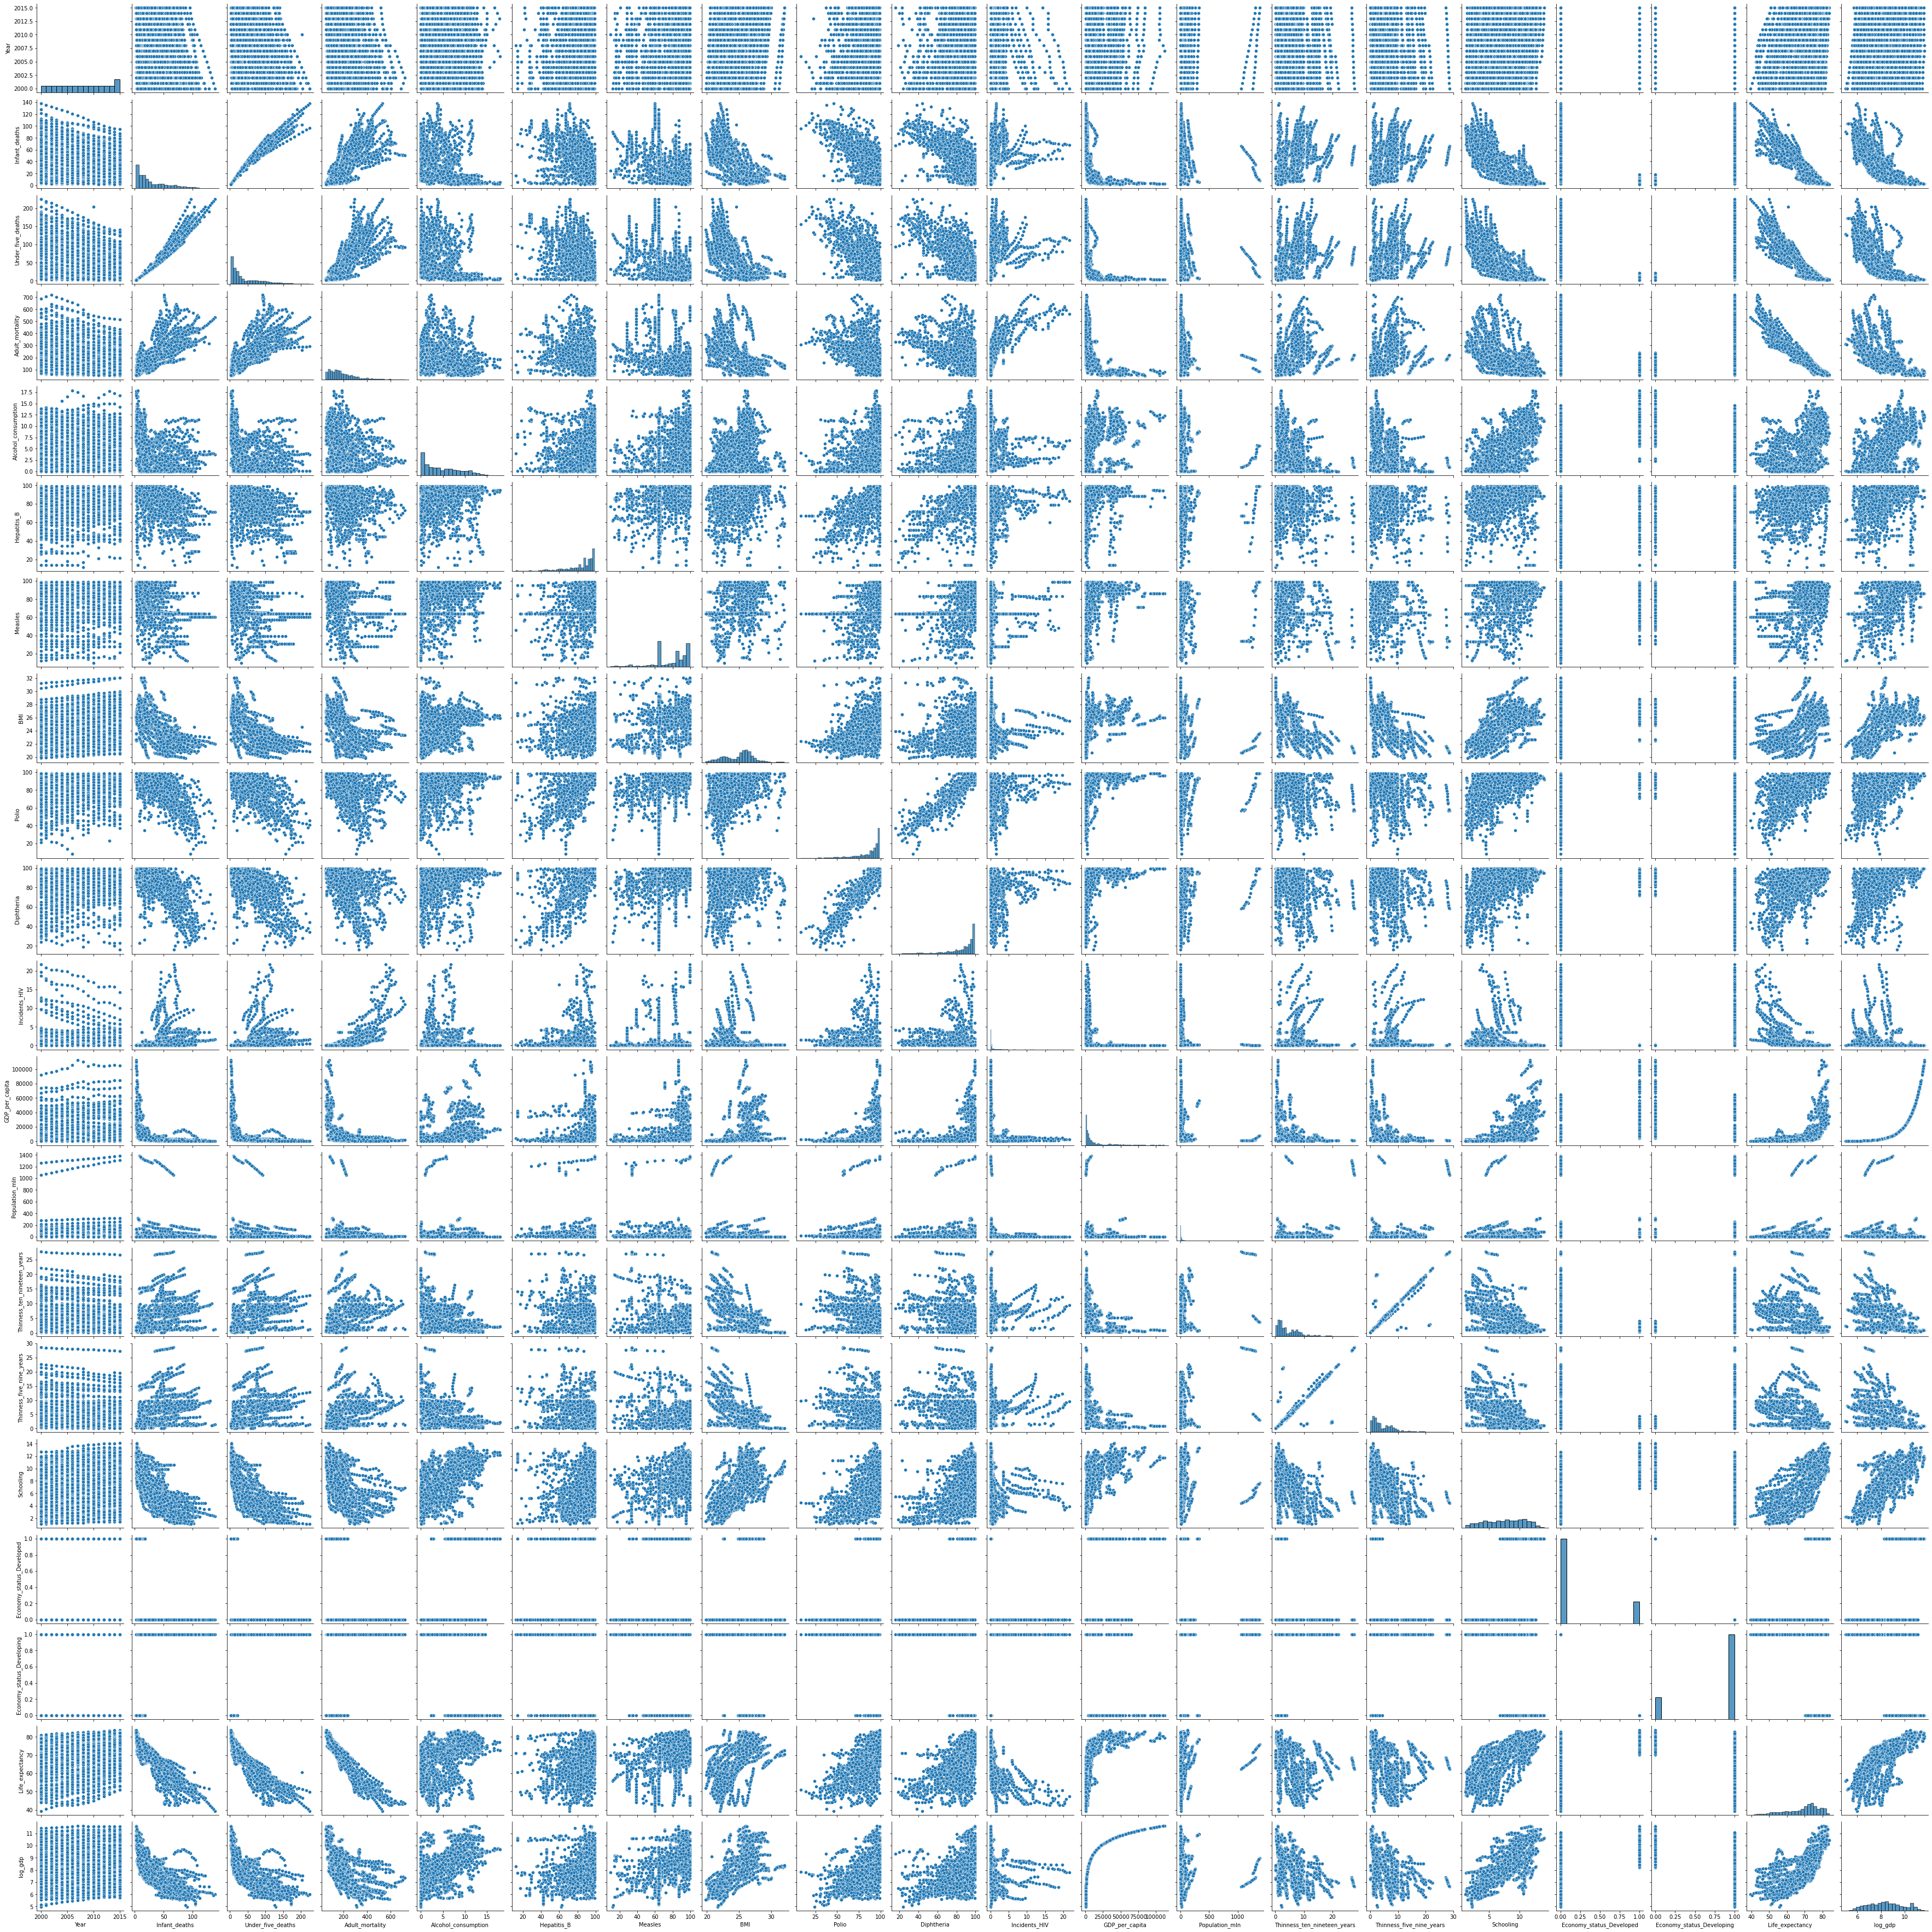

In [42]:
# Pairplots to observe trends between each pair of variables
sns.pairplot(df)
plt.show()

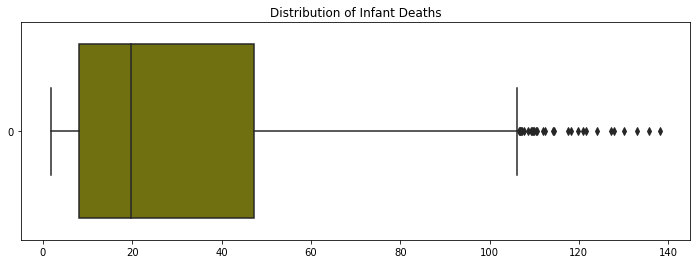

In [39]:
# Checking the Infant_deaths distribution
plt.figure(figsize = (12,4))
sns.boxplot(data = df['Infant_deaths'],
            orient = 'h',
            color = 'olive')
plt.title('Distribution of Infant Deaths')
plt.show()

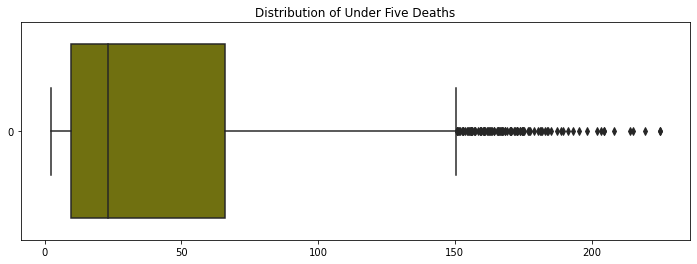

In [37]:
# Checking the Under_five_deaths distribution
plt.figure(figsize = (12, 4))
sns.boxplot(data = df['Under_five_deaths'],
            orient = 'h',
            color = 'olive')
plt.title('Distribution of Under Five Deaths')
plt.show()

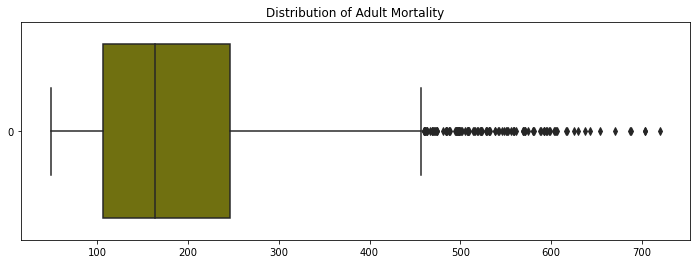

In [38]:
# Checking the Adult_mortality distribution
plt.figure(figsize = (12,4))
sns.boxplot(data = df['Adult_mortality'],
            orient = 'h',
            color = 'olive')
plt.title('Distribution of Adult Mortality')
plt.show()

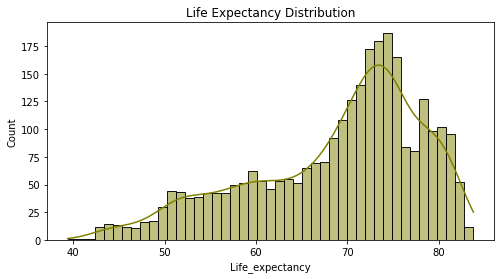

In [17]:
# Using a histogram to check life_expectancy distribution

plt.figure(figsize=(8, 4))
sns.histplot(data=df, 
             x='Life_expectancy', 
             bins=45, 
             kde=True,
             color = 'olive')
plt.title('Life Expectancy Distribution')
plt.show()

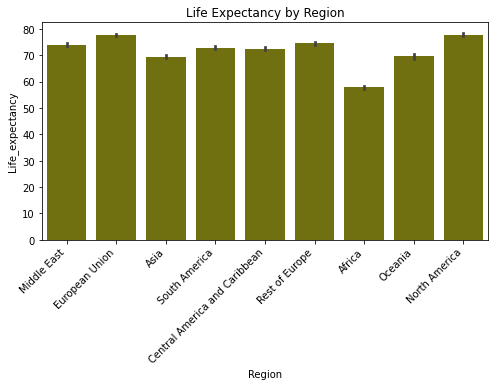

In [18]:
# Plotting the life expectancy of each region

plt.figure(figsize=(8, 4))
sns.barplot(data=df, 
            x='Region', 
            y='Life_expectancy',
            color = 'olive')

plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Life Expectancy by Region')
plt.show()

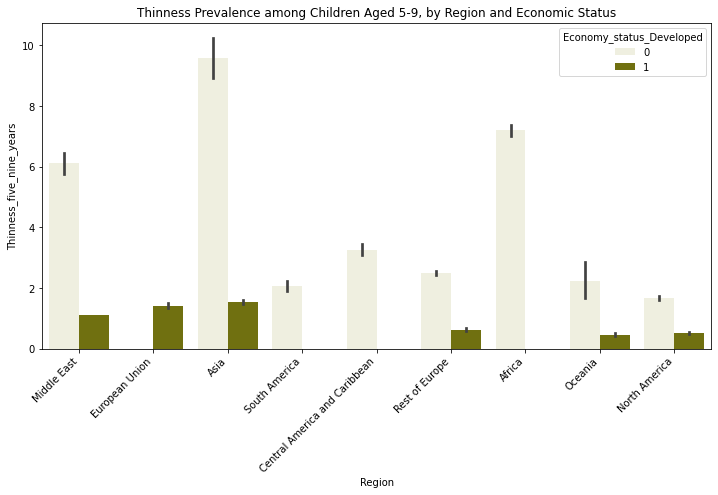

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, 
            y = 'Thinness_five_nine_years',
            x = 'Region',
            hue = 'Economy_status_Developed',
            color = 'olive')
            #bins=13,
            #kde=True)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Thinness Prevalence among Children Aged 5-9, by Region and Economic Status')
plt.show()

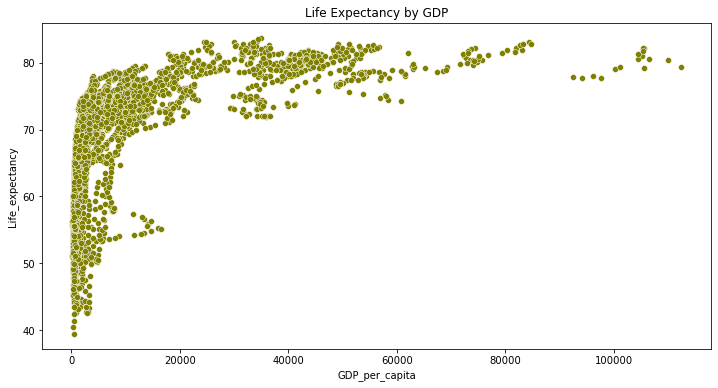

In [33]:
# Plot showing life expectancy against GDP
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, 
            x='GDP_per_capita',
            y='Life_expectancy',
            color = 'olive')
            #bins=13,
            #kde=True)
        
plt.title('Life Expectancy by GDP')
plt.show()

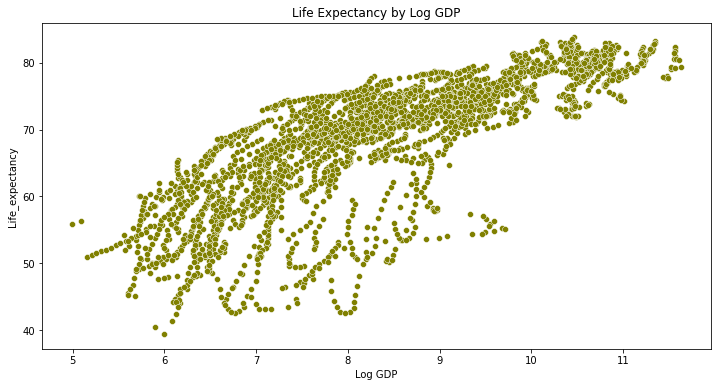

In [60]:
# Plot showing log GDP against life expectancy
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, 
            x=np.log(df['GDP_per_capita']),
            y='Life_expectancy',
            color = 'olive')
        
plt.xlabel('Log GDP')
plt.title('Life Expectancy by Log GDP')
plt.show()

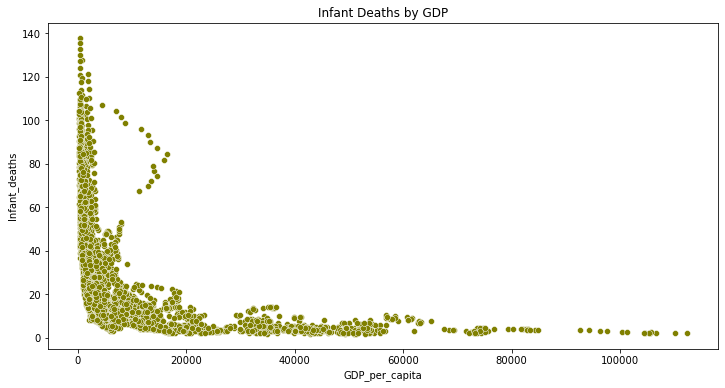

In [55]:
# Plot showing infant deaths against GDP
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, 
            x='GDP_per_capita',
            y='Infant_deaths',
            color = 'olive')
            #bins=13,
            #kde=True)
        
plt.title('Infant Deaths by GDP')
plt.show()

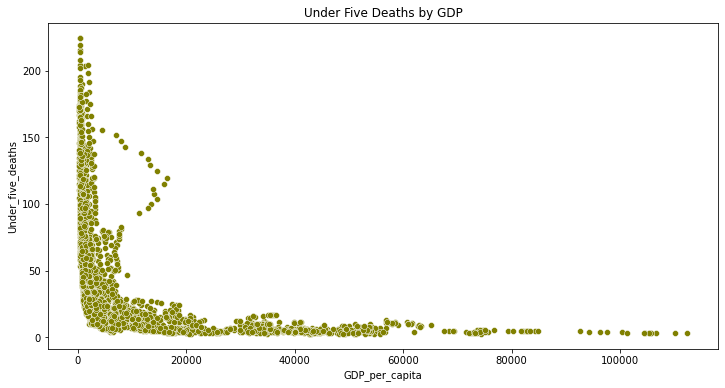

In [56]:
# Plot showing under five deaths against GDP
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, 
            x='GDP_per_capita',
            y='Under_five_deaths',
            color = 'olive')
            #bins=13,
            #kde=True)
        
plt.title('Under Five Deaths by GDP')
plt.show()

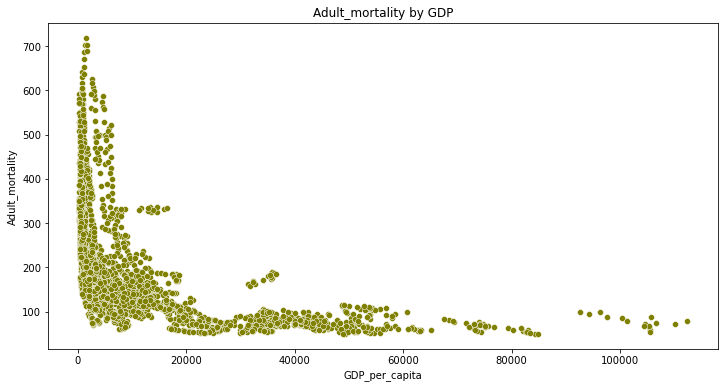

In [57]:
# Plot showing adult mortality against GDP
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, 
            x='GDP_per_capita',
            y='Adult_mortality',
            color = 'olive')
            #bins=13,
            #kde=True)
        
plt.title('Adult Mortality by GDP')
plt.show()

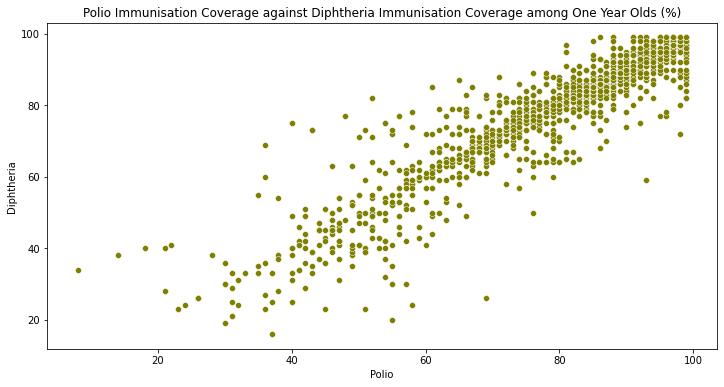

In [64]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, 
            x='Polio',
            y='Diphtheria',
            color = 'olive')

plt.title('Polio Immunisation Coverage against Diphtheria Immunisation Coverage among One Year Olds (%)')
plt.show()

## Notes
* The distribution for the `Infant_deaths`, `Under_five_deaths`, and `Adult_mortality` features are all right-skewed, with many outliers above std*1.5 + Q3 - the last whisker. This tells us that the majority of countries have low mortality rates.
* The distribution of the `Life_expectancy` feature is left-skewed. Most people have average or higher life expectancy, with only some individuals having low life expentancies. The most common life expectancy is **75**. This is in contrast to the mean life expectancy of **69**.
* The **North America** and **European Union** regions have the highest average life expectancy. **Africa** has by far the lowest average life expectancy.
* There are *no* **Developed** countries in the regions of  **South America**, **Central America and Caribbean**, or **Africa**, and *only* **Developed** countries in the **European Union**.
* **Asia** has the highest average prevalence of thinness among **Non-developed** countries.
* **Oceana** has the lowest average prevalence of thinness among **Developed** countries.
* `GDP_per_capita` has a logarithmic relationship with `Life_expectancy`. By applying a **Log** transformation to `GDP_per_capita`, its relationship with `Life_expectancy` becomes somewhat linear.
* There are strong similarities in the relationship between `Infant_deaths`, `Under_five_deaths`, `Adult_mortality` and `GDP_per_capita`. This makes sense, as these features are potentially all connected. Studies have shown that increased GDP is linked to lower mortality rates [1]. 
* A plot comparing immunisation coverage against **Polio** and **Diphtheria** shows a positive linear relationship between the two. The WHO website [2] details how these two immunisations are often given combined, hence why it is likely that a one year-old who has receieved the Polio vaccine has also received the Diphtheria vaccine.

## Sources
[1] Dadgar I, Norström T. Is there a link between all-cause mortality and economic fluctuations? Scand J Public Health. 2022 Feb;50(1):6-15. doi: 10.1177/14034948211049979. Epub 2021 Oct 20. PMID: 34666579; PMCID: PMC8808227. https://pmc.ncbi.nlm.nih.gov/articles/PMC8808227/

[2] https://www.who.int/news-room/fact-sheets/detail/diphtheria